In [5]:
import xarray as xr
import numpy as np
import datetime
def data_ones(x):
    x_new=x/x
    x_new=x_new.fillna(0)
    return x_new

In [6]:
#make oscar monthly data
#dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'
for lyr in range(1993,2019): #2017):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    ds_month = ds.resample(time='M').mean()    
    ds.close()
    ds_month.to_netcdf(dir_data + str(lyr) + 'monthly_data_oscar.nc')
#check that yes, resampling is averaging for center of month
#ds_month.u[0,0,450,900].data
#ds.u[0:7,0,450,900].mean()

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 481, longitude: 1201, time: 72, year: 72)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2016-01-06 ... 2016-12-26
  * year       (year) float32 2016.0 2016.0139 2016.0278 ... 2016.9722 2016.9861
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
Data variables:
    u          (time, depth, latitude, longitude) float64 ...
    v          (time, depth, latitude, longitude) float64 ...
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,2016 to Dec.26,2016
    year:           2016
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  03:18 03-Aug-2017
    version:        2009.0
    source:         Gary Lagerloef, ESR 

In [26]:
#make monthly climatology
dir_data = 'F:/data/sat_data/oscar/L4/oscar_third_deg/'
for lyr in range(1993,2019):
    filename = dir_data + str(lyr) + 'monthly_data_oscar.nc'
    ds=xr.open_dataset(filename)
    if lyr==1993:
        ds_clim = ds
    else:
        ds_clim = xr.concat([ds_clim,ds],dim = 'time')
    ds.close()
ds_clim = ds_clim.mean('time')
ds_clim.to_netcdf(dir_data + 'climatology_1993_2018_monthly_data_oscar.nc')

C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


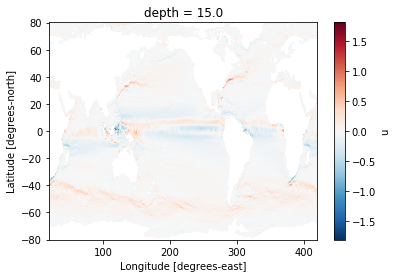

In [29]:
ds_clim.u.plot()

array(-0.00581426)

<xarray.DataArray 'u' ()>
array(nan)
Coordinates:
    time       datetime64[ns] 2016-01-01
    depth      float32 15.0
    latitude   float64 80.0
    longitude  float64 20.0
Attributes:
    units:      meter/sec
    long_name:  Ocean Surface Zonal Currents

C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarray\core\nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\gentemann\Miniconda3\lib\site-packages\xarr

In [ ]:
#make oscar climatology
#dir_data='F:/data/sat_data/oscar/L4/oscar_third_deg/'
dir_clim='F:/data/sat_data/oscar/L4/oscar_third_deg/climatology/'
dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
for lyr in range(1993,2018):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc.gz'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    ds_count=data_ones(ds)
    #in order to add up the data the time arrays have to be aligned otherwise xarray doesn't know what to do with it
    ds['time'] = ds['time'] - np.datetime64(lyr,'Y')
    ds_count['time'] = ds_count['time'] - np.datetime64(lyr,'Y')
    if lyr==1993:
        ds2=ds.fillna(0)
        ds_count2=ds_count.fillna(0)
        ds_summer=ds2
        ds_counter = ds_count2
    else:
        ds2 = ds.interp_like(ds_summer.time)
        ds_count2 = ds_count.interp_like(ds_summer.time)
        ds2=ds2.fillna(0)
        ds_count2=ds_count2.fillna(0)
        ds_summer=ds_summer + ds2
        ds_counter = ds_counter + ds_count2
    print(lyr)
    print(ds.u.shape)
    print(ds_summer.u.shape)
   # print(ds_counter.u.shape)
   # print(ds.u.shape)
   # print(ds.time.data[0:20])
ds_ave = ds_summer / ds_counter
ds_ave.to_netcdf(dir_clim + 'oscar_v2009_1993_2016_climatology_12202118.nc')

In [ ]:
#make oscar climatology
#dir_data='F:/data/sat_data/oscar/L4/oscar_third_deg/'
dir_clim='F:/data/sat_data/oscar/L4/oscar_third_deg/climatology/'
dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
for lyr in range(1993,2018):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc.gz'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    #ds_count=data_ones(ds)
    #in order to add up the data the time arrays have to be aligned otherwise xarray doesn't know what to do with it
    ds['time'] = ds['time'] - np.datetime64(lyr,'Y')
    #ds_count['time'] = ds_count['time'] - np.datetime64(lyr,'Y')
    if lyr==1993:
        #ds2=ds.fillna(0)
        #ds_count2=ds_count.fillna(0)
        ds_save = ds
#        ds2['time'] = ds2['time'] + np.datetime64(lyr,'Y')
#        ds_summer=ds2
        ds['time'] = ds['time'] + np.datetime64(lyr,'Y')
        ds_summer=ds
     #   ds_counter = ds_count2
    else:
        ds2 = ds.interp_like(ds_save.time)
        #ds_count2 = ds_count.interp_like(ds_summer.time)
        #ds2=ds2.fillna(0)
        #ds_count2=ds_count2.fillna(0)
        ds2['time'] = ds2['time'] + np.datetime64(lyr,'Y')
        ds_summer = xr.concat([ds_summer,ds2],dim = 'time')
        #ds_summer=ds_summer + ds2
        #ds_counter = ds_counter + ds_count2
    print(lyr)
    print(ds.u.shape)
    print(ds_summer.u.shape)
   # print(ds_counter.u.shape)
   # print(ds.u.shape)
   # print(ds.time.data[0:20])
#ds_ave = ds_summer / ds_counter
ds_ave = ds_summer.mean('time')
ds_ave.to_netcdf(dir_clim + 'oscar_v2009_1993_2016_climatology_12202118a.nc')

In [2]:
ds_ave


NameError: name 'ds_ave' is not defined

In [ ]:
#year after leap year, the days are all +1
#for i in range(0,73):
#    print(ds2.time[i].data + np.datetime64(1995,'Y'), ds_counter.time[i].data + np.datetime64(1995,'Y'))
#    print(ds.u[0,0,200,600].data,ds2.u[0,0,200,600].data,ds.u[1,0,200,600].data)


In [ ]:
ds

In [ ]:
print(ds_ave.u.shape)
print(ds.u.shape)
print(ds_count.u.shape)
print(ds_summer.u.shape)
print(ds_counter.u.shape)

In [ ]:
#check that time all the same, even leap years
for lyr in range(1993,2018):
    filename = dir_cmc + 'oscar_vel' + str(lyr).zfill(4) + '.nc'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    print(ds.time[12].data)

In [ ]:
ds_counter

In [ ]:
ds.time[12].data

In [ ]:
    clim_sum=clim_sum+ds.analysed_sst.data
    clim_cnt=clim_cnt+1
    #print(clim_sum[0,1,1],clim_sum[0,400,900])
    #print(clim_cnt[0,1,1],clim_cnt[0,400,900])
clim_sum=clim_sum/clim_cnt
    #print(clim_sum[0,1,1],clim_sum[0,400,900])
fname_tem='clim1993_2016' + sjdy + '-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0a.nc'
cmc_filename2 = dir_cmc_clim + fname_tem
foo = xr.DataArray(clim_sum, coords=[ds.time, ds.lat, ds.lon], dims=['time', 'lat', 'lon'])
foo.to_netcdf(cmc_filename2)
foo = xr.DataArray(clim_sum, coords=[ds.time, ds.lat, ds.lon], dims=['time', 'lat', 'lon'])
clim_sum.setncatts=ds.analysed_sst.attrs

